In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from tabulate import tabulate

In [2]:
# import Data
data = np.loadtxt("aufgabe4.dat", skiprows=3)
t_dat = data[:,0]
N_dat = data[:,1]
sigma = np.sqrt(N_dat)

In [3]:
def N_t(t, N_0, N_1, N_2, lambda_1, lambda_2):
    return N_0 + N_1*np.exp(-lambda_1*t) + N_2*np.exp(-lambda_2*t)

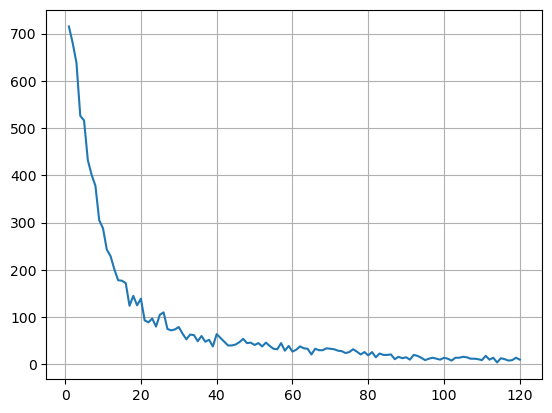

In [4]:
plt.plot(t_dat, N_dat)
plt.grid()

In [5]:
def X_sq(x):
    N_0, N_1, N_2, lambda_1, lambda_2 = x
    frac = (N_dat - N_0 - N_1*np.exp(-lambda_1*t_dat) - N_2*np.exp(-lambda_2*t_dat))/sigma
    return np.sum(frac**2)

x0 = [0, 800, 100, 0.1, 0.01]


res_DS = minimize(X_sq, x0, method='nelder-mead')
print("Downhill Simplex:")
print(res_DS.x)
print(X_sq(res_DS.x))

# x0 = res_DS.x
x0 = [0, 800, 100, 0.1, 0.01]
res_CG = minimize(X_sq, x0, method='CG')
print("Conjugate Gradient:")
print(res_CG.x)
print(X_sq(res_CG.x))

Downhill Simplex:
[-9.54111483e+00  7.77539056e+02  1.02795660e+02  1.35679080e-01
  1.50564162e-02]
130.62050550508565
Conjugate Gradient:
[1.63850092e+01 6.94928498e+02 9.99458491e+01 8.81228404e-02
 2.27714940e+01]
490.1977646276784


Text(0.5, 1.0, 'Optimale Werte mit verschiedenen Optimierungsmethoden')

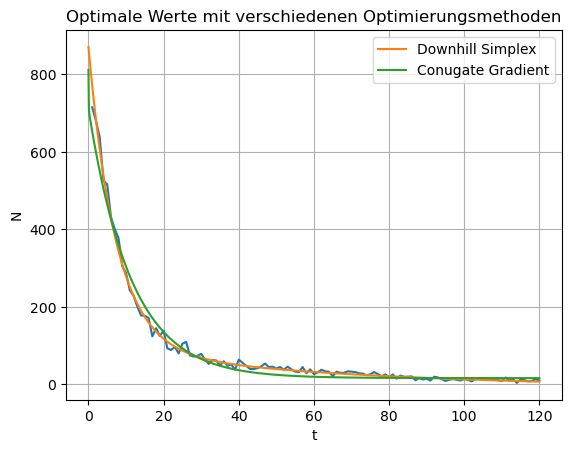

In [6]:
t = np.linspace(0,120,1000)

plt.plot(t_dat, N_dat)
plt.plot(t,N_t(t,*res_DS.x), label="Downhill Simplex")
plt.plot(t,N_t(t,*res_CG.x), label="Conugate Gradient")
plt.legend()
plt.grid()
plt.xlabel("t")
plt.ylabel("N")
plt.title("Optimale Werte mit verschiedenen Optimierungsmethoden")

In [7]:
table = [["Downhill Simplex"] + list(res_DS.x), ["Conjugate Gradients"] + list(res_CG.x)]
# print(table)
print(tabulate(table, headers=["Optimierungsmethode", "N_0", "N_1", "N_2", "lambda_1", "lambda_2"],numalign="right", tablefmt="latex"))

\begin{tabular}{lrrrrr}
\hline
 Optimierungsmethode   &      N\_0 &     N\_1 &     N\_2 &   lambda\_1 &   lambda\_2 \\
\hline
 Downhill Simplex      & -9.54111 & 777.539 & 102.796 &   0.135679 &  0.0150564 \\
 Conjugate Gradients   &   16.385 & 694.928 & 99.9458 &  0.0881228 &    22.7715 \\
\hline
\end{tabular}
